<a href="https://colab.research.google.com/github/chejige/Youtube-view-Estimator-and-dashboard/blob/main/Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Youtube Views Prediction


## Description
###Objective
Build model to predict video views based on statistical numbers and other attributes.

###About dataset
This dataset is obtained from API data scraping from youtube channel.

###Main Instructions
Exploratory analysis from the data, create some visualization to describe the data
Describe the pre-processing steps, also the reason behind them
Split the data into training and testing with optional portion
Build the models with matching hyperparameter tune, choose the best model, also the reason behind that
Test the model with data test

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling
from datetime import datetime

##Load and Describe Data

In [153]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [154]:
link = 'https://drive.google.com/file/d/1-4SI7wR7UQ1bPb6KGSHbcOkQnM99QaZe/view?usp=sharing'
 
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('df_multiplist.csv') 
df_raw = pd.read_csv('df_multiplist.csv',index_col=0)

In [155]:
df_raw.head()

,ID,Title,Publish_date,viewer_count,like_count,comment_count,categroyID,description,duration,Links,tags,plist_num,plist1,plist2,plist3,plist4,plist5
0,Z3A3TQM5zZc,Live Stream - Mutual Information/AMA/Ukulele S...,2022-09-20,4119,186,15,27,Mutual Information is a cool way to see how tw...,PT47M19S,https://www.youtube.com/watch?v=Z3A3TQM5zZc,"['StatQuest', 'Josh Starmer', 'Machine Learnin...",NaN,NaN,NaN,NaN,NaN,NaN
1,khMzi6xPbuM,Introduction to Coding Neural Networks with Py...,2022-09-19,9432,407,44,27,Although we've seen how to code a simple neura...,PT20M43S,https://www.youtube.com/watch?v=khMzi6xPbuM,"['Josh Starmer', 'StatQuest', 'Machine Learnin...",NaN,NaN,NaN,NaN,NaN,NaN
2,CHOir6-ZpkE,Three more lessons from my Pop!!!,2022-09-04,8307,373,71,27,Since September 4th is Global Frank Starmer Da...,PT5M28S,https://www.youtube.com/watch?v=CHOir6-ZpkE,"['Josh Starmer', 'StatQuest', 'Machine Learnin...",NaN,NaN,NaN,NaN,NaN,NaN
3,AsNTP8Kwu80,"Recurrent Neural Networks (RNNs), Clearly Expl...",2022-07-11,43389,1634,236,27,When you don't always have the same amount of ...,PT16M37S,https://www.youtube.com/watch?v=AsNTP8Kwu80,"['Josh Starmer', 'StatQuest', 'Machine Learnin...",3.0,Neural Networks / Deep Learning,Machine Learning,StatQuest,NaN,NaN
4,80-Wpwf1_dg,The StatQuest Illustrated Guide To Machine Lea...,2022-05-09,23215,777,218,27,Because every StatQuest starts with a Silly So...,PT15S,https://www.youtube.com/watch?v=80-Wpwf1_dg,"['Josh Starmer', 'StatQuest', 'Machine Learnin...",NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df=df_raw.copy()

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             221 non-null    object 
 1   Title          221 non-null    object 
 2   Publish_date   221 non-null    object 
 3   viewer_count   221 non-null    int64  
 4   like_count     221 non-null    int64  
 5   comment_count  221 non-null    int64  
 6   categroyID     221 non-null    int64  
 7   description    221 non-null    object 
 8   duration       221 non-null    object 
 9   Links          221 non-null    object 
 10  tags           221 non-null    object 
 11  plist_num      188 non-null    float64
 12  plist1         188 non-null    object 
 13  plist2         144 non-null    object 
 14  plist3         99 non-null     object 
 15  plist4         41 non-null     object 
 16  plist5         2 non-null      object 
dtypes: float64(1), int64(4), object(12)
memory usage: 31.1

###Conclusion</br>

*   Dataframe have 17 columns and 221 rows
*   Total categorical columns are 16 columns and 5 columns for numerical columns
*   views column is the target for this dataset
*   Description has no meaning, can change to length of description. 
*   Duration is not numerical value, need to change.
*   Publishdata also is not timedata format.
*   Can have one more column--time after published
*   Can have one more column--Tag number










##Data pre-cleaning

In [158]:
#change pbulish date to datetime format
df['Publish_date']=df['Publish_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [159]:
# change to length of description
df['description']=df['description'].apply(lambda x: len(x.strip()))

In [160]:
df['description']

0      1239
1      1792
2      1798
3      2061
4      1006
5      2324
6      1537
7      1094
8      2109
9      1794
10     1561
11     1093
12      234
13      234
14     1214
15     1681
16     1815
17     1257
18     1430
19     1684
20     1895
21     1859
22     2732
23     1245
24     1445
25     1988
26     1639
27     1351
28     1932
29     1697
30     1679
31     1402
32     1577
33     1659
34     1671
35     1575
36     1854
37     1947
38     1851
39     1602
40     1616
41     1922
42     2018
43     1494
44     1907
45     1866
46     1895
47     1453
48     1849
49     1639
50     1521
51     1006
52     1417
53     1009
54     1169
55     1849
56     1663
57     1796
58     1272
59     1339
60     1343
61     1787
62     1618
63     1230
64      891
65     1669
66      840
67     2440
68     1149
69     1136
70     1450
71     2036
72     1202
73     2355
74     1365
75     1949
76     1859
77     1735
78     2095
79     2044
80     2071
81     1904
82     1531
83  

In [161]:
# change duration to min (ignore sencond)
df['duration']=df['duration'].apply(lambda x:'1' if "S" in x.split('M')[0].replace('PT','') else x.split('M')[0].replace('PT','') )
df['duration']=df['duration'].apply(lambda x:(int(x.split('H')[0])*60+int(x.split('H')[1])) if "H" in x else int(x) )

In [162]:
pd.options.display.max_rows = 999
df['duration']

0      47
1      20
2       5
3      16
4       1
5      23
6       5
7       1
8      16
9      18
10      9
11      1
12      1
13      1
14      9
15      6
16     16
17     14
18     10
19      8
20      9
21      6
22     19
23     11
24      5
25     18
26      3
27     13
28     15
29     22
30      9
31      7
32     14
33     13
34      8
35      8
36     13
37     18
38     17
39     15
40     18
41     56
42     73
43     18
44     14
45      9
46     44
47     32
48     66
49      9
50     15
51     31
52      9
53     30
54     24
55     16
56      8
57     13
58     33
59     36
60      2
61     25
62     11
63     38
64     35
65     24
66     37
67     27
68     36
69     28
70     11
71     25
72     24
73     25
74     11
75     16
76     15
77      7
78     20
79     22
80     19
81     22
82     17
83     14
84     16
85     14
86     10
87     37
88     17
89      3
90     26
91     15
92      3
93     23
94      3
95     20
96     14
97      4
98     15
99      3


In [163]:
#add one more column 'publish_time' (how many month of videos after published)
today = datetime.today()
df['publish_time']=today-df['Publish_date']
df['publish_time']=df['publish_time'].apply(lambda x:int(str(x).split(' ')[0]))

In [164]:
# add tag numbers columns
df['tag_num']=df['tags'].apply(lambda x:len(x.split(',')))

In [165]:
# remove invalent columns
df=df.drop(['ID','Title','Links','tags'],axis=1)

In [166]:
df_pre=df.copy()

In [167]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Publish_date   221 non-null    datetime64[ns]
 1   viewer_count   221 non-null    int64         
 2   like_count     221 non-null    int64         
 3   comment_count  221 non-null    int64         
 4   categroyID     221 non-null    int64         
 5   description    221 non-null    int64         
 6   duration       221 non-null    int64         
 7   plist_num      188 non-null    float64       
 8   plist1         188 non-null    object        
 9   plist2         144 non-null    object        
 10  plist3         99 non-null     object        
 11  plist4         41 non-null     object        
 12  plist5         2 non-null      object        
 13  publish_time   221 non-null    int64         
 14  tag_num        221 non-null    int64         
dtypes: datetime64[ns](1), f

##Exploratory Data Analysis
###Statistical Summary

In [168]:
df_pre.columns

Index(['Publish_date', 'viewer_count', 'like_count', 'comment_count',
       'categroyID', 'description', 'duration', 'plist_num', 'plist1',
       'plist2', 'plist3', 'plist4', 'plist5', 'publish_time', 'tag_num'],
      dtype='object')

In [169]:
#Separation of Categorical and Numerical Data
cats=['plist1','plist2','plist3','plist4','plist5']
nums=['viewer_count', 'like_count', 'comment_count',
       'categroyID', 'description', 'duration', 'plist_num', 
       'publish_time', 'tag_num']


In [170]:
#Statistical Numerical Data
df_pre.describe()

,viewer_count,like_count,comment_count,categroyID,description,duration,plist_num,publish_time,tag_num
count,2.210000e+02,221.000000,221.000000,221.000000,221.000000,221.000000,188.000000,221.000000,221.000000
mean,1.850818e+05,4171.674208,317.561086,23.162896,1462.719457,12.090498,2.521277,1395.506787,6.638009
std,2.781622e+05,6098.413587,427.587612,9.123929,480.650282,11.026041,1.096701,667.968873,2.399849
min,3.550000e+02,6.000000,1.000000,1.000000,234.000000,1.000000,1.000000,6.000000,1.000000
25%,1.231200e+04,452.000000,60.000000,27.000000,1109.000000,4.000000,2.000000,875.000000,5.000000
50%,7.959400e+04,1944.000000,177.000000,27.000000,1362.000000,9.000000,3.000000,1484.000000,6.000000
75%,2.271070e+05,4775.000000,409.000000,27.000000,1735.000000,16.000000,3.000000,1883.000000,8.000000
max,1.966663e+06,41774.000000,3773.000000,27.000000,4163.000000,73.000000,5.000000,2955.000000,13.000000


###Conclusion from Statistical Numerical Data

The distribution of data for feature viewer_count,	like_count,	comment_count looks skewed (mean & median are not close enough)
categroyID is more like categorical feature instead of numerical data.


In [171]:
# change categroyID to catagorical data
df_pre['categroyID']=df_pre['categroyID'].astype('str')

In [172]:
#Statistical Categorical Data
cats=['categroyID','plist1','plist2','plist3','plist4','plist5']

df_pre[cats].describe()

,categroyID,plist1,plist2,plist3,plist4,plist5
count,221,188,144,99,41,2
unique,5,15,13,4,2,1
top,27,#66DaysOfData,Machine Learning,StatQuest,StatQuest,StatQuest
freq,186,73,44,57,39,2


###Categorical Data Conclusion
Data in plist1 has 188 unique value, top is #66DaysOfData.
Data in plist2 has 144 unique value, top is Machine Learning.
Data in plist3 has 99 unique value, top is StarQuest.
Data in plist4 has 41 unique value, top is StarQuest.
Data in plist5 has 2 unique value, top is StarQuest.
Plist1 has the highest playlist number, together with playlist number, should be enough features. So we can drop other plist.


In [173]:
data=df_pre.drop(['plist2','plist3','plist4','plist5'],axis=1)

###Graphical Approaching

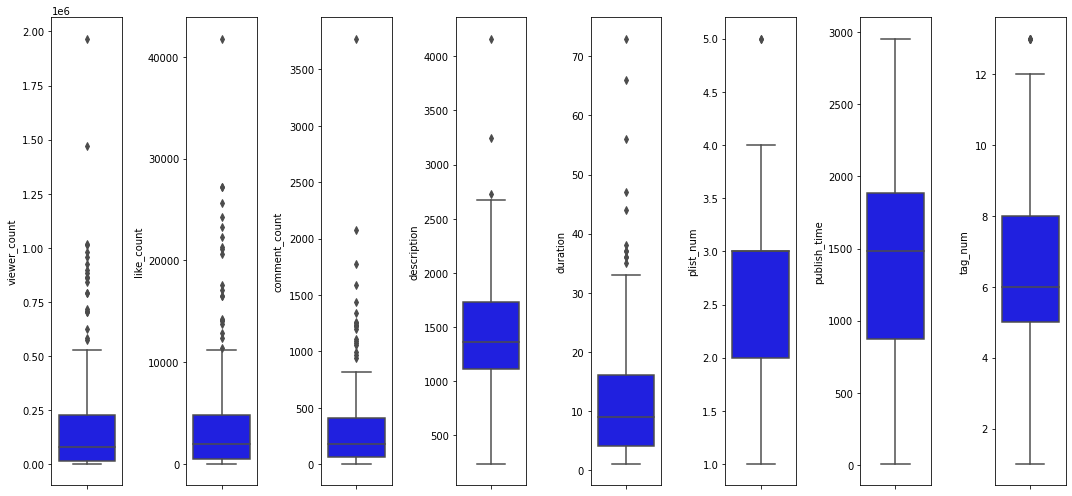

In [174]:
# look at the distribution of data with boxplot
nums=['viewer_count', 'like_count', 'comment_count','description', 'duration', 'plist_num', 'publish_time', 'tag_num']
plt.figure(figsize=(15, 7))
for i,feature in enumerate(nums):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=data[feature],color='blue',orient='v')
    plt.tight_layout();


It can be seen in the boxplot graph above that the viewer_count, like_count,comment_count, description, duration features have many outliers so that logarithmic transformations are needed for these features.

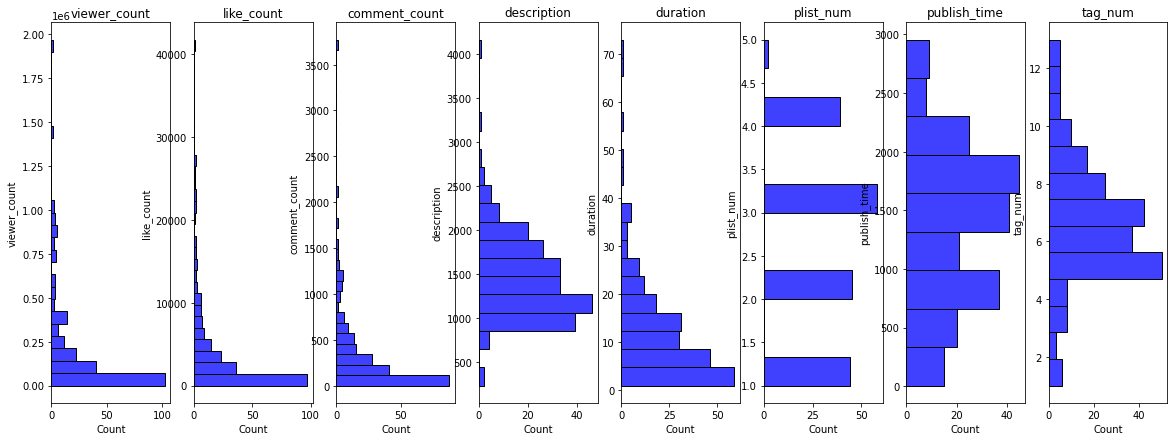

In [175]:
#View data distribution

plt.figure(figsize=(20, 7))
for i,feature in enumerate(nums):
    plt.subplot(1, 8, i+1)
    sns.histplot(y=data[feature],color='blue').set(title=feature)
    

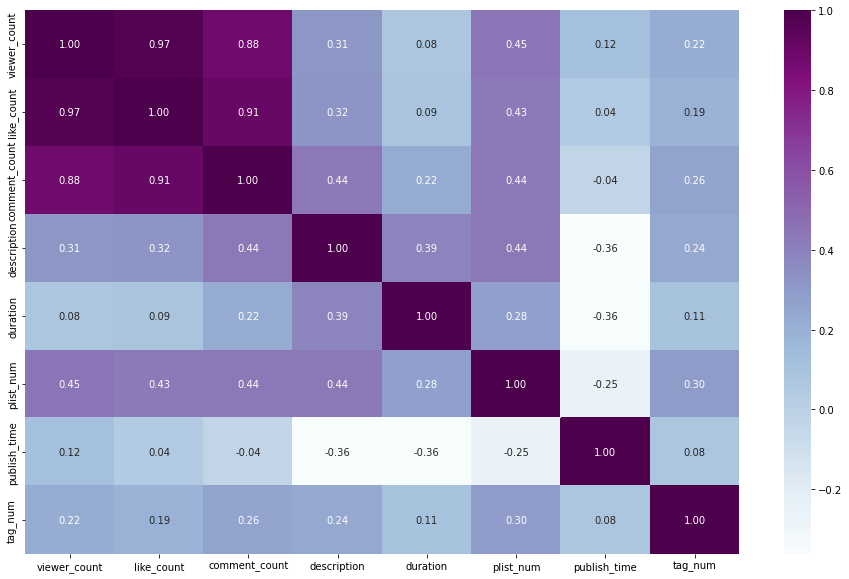

In [176]:
#create a correlation matrix from each numeric data
corr_= data[nums].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");

There are 3 features that have a strong positive correlation to views, namely the likes_count, comment_count,plist_num features.

<Figure size 720x576 with 0 Axes>

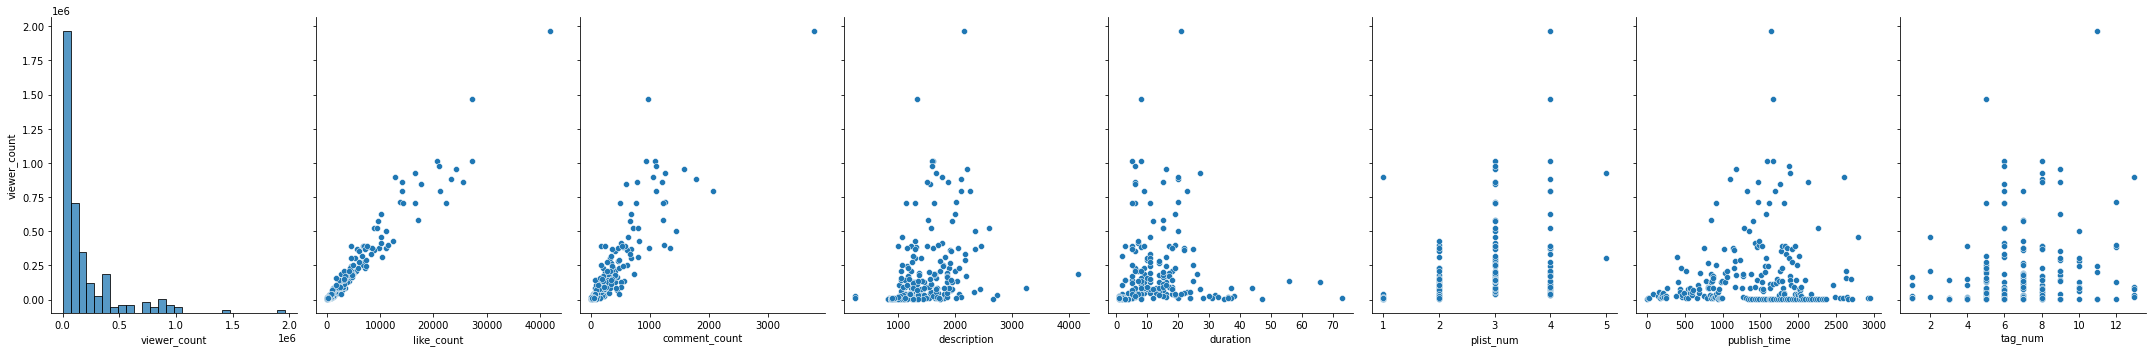

In [177]:
#create a pairplot graph from each numeric data
plt.figure(figsize=(10,8))
sns.pairplot(data=data, x_vars=nums, y_vars=['viewer_count'], height=5, aspect=0.75);
plt.tight_layout()

Simple EDA

In boxplot charts of viewer_count, like_count,comment_count, description, duration features have many outliers, it can be seen that the data distribution is uneven and has lots of outliers.
Then when we look at the heatmap, we can see that almost all the features that are positively correlated with the views of a video, so maybe these features are of feature importance for doing machine learning modeling

##Data Preparation

In [178]:
#see the number of missing values from the data frame
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,Publish_date,0
1,viewer_count,0
2,like_count,0
3,comment_count,0
4,categroyID,0
5,description,0
6,duration,0
7,plist_num,33
8,plist1,33
9,publish_time,0


In [179]:
#see the percentage of missing value for each feature
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value

,feature,missing_value,percentage
0,plist_num,33,14.93
1,plist1,33,14.93
2,Publish_date,0,0.00
3,viewer_count,0,0.00
4,like_count,0,0.00
5,comment_count,0,0.00
6,categroyID,0,0.00
7,description,0,0.00
8,duration,0,0.00
9,publish_time,0,0.00


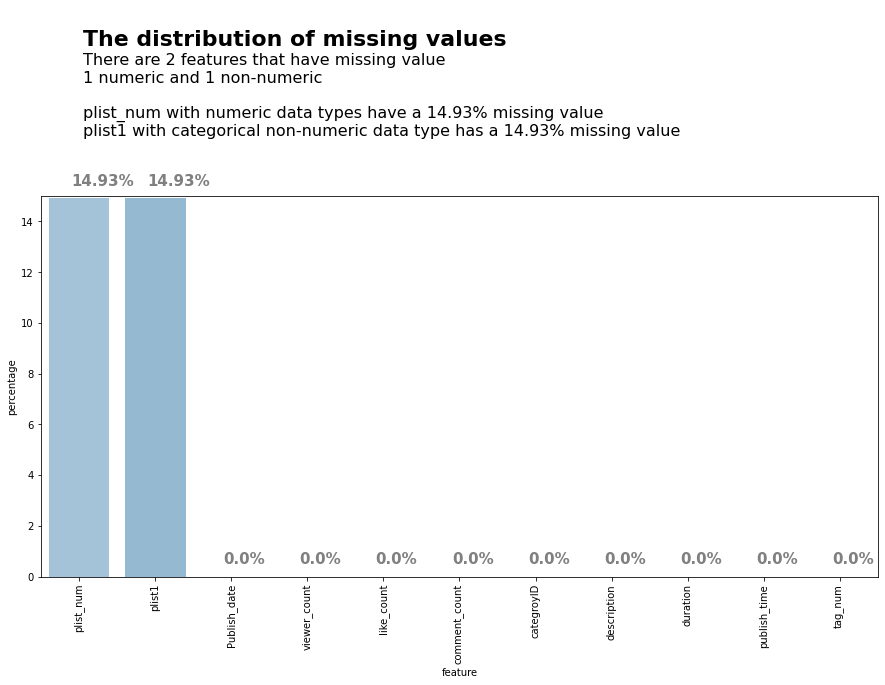

In [180]:
#View the distribution of missing values using the barplot
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'feature',y='percentage',data=data_missing_value,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+0.5, str(v)+'%', fontsize = 15, color='gray', fontweight='bold')
    
title = '''
The distribution of missing values
'''
ax.text(0.05,20,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')    

text = '''
There are 2 features that have missing value
1 numeric and 1 non-numeric

plist_num with numeric data types have a 14.93% missing value
plist1 with categorical non-numeric data type has a 14.93% missing value

'''
ax.text(0.05,16,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')

ax.set_ylim(0,15)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout;
#plt.savefig('fig/distribusi nilai hilang.png');


In [181]:
# fill the plist_num value wit 0
data['plist_num']=data['plist_num'].fillna(0)

In [182]:
# fill the plist_num value wit na
data['plist1']=data['plist1'].fillna('na')

In [183]:
data.isna().sum()

Publish_date     0
viewer_count     0
like_count       0
comment_count    0
categroyID       0
description      0
duration         0
plist_num        0
plist1           0
publish_time     0
tag_num          0
dtype: int64

In [184]:
#see the number of duplicate data
data.duplicated().sum()

0

Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

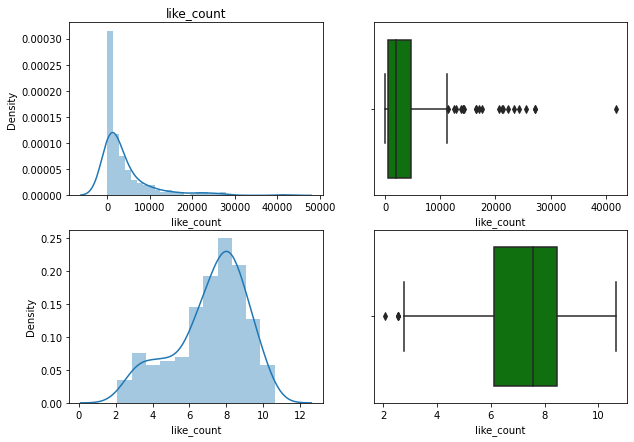

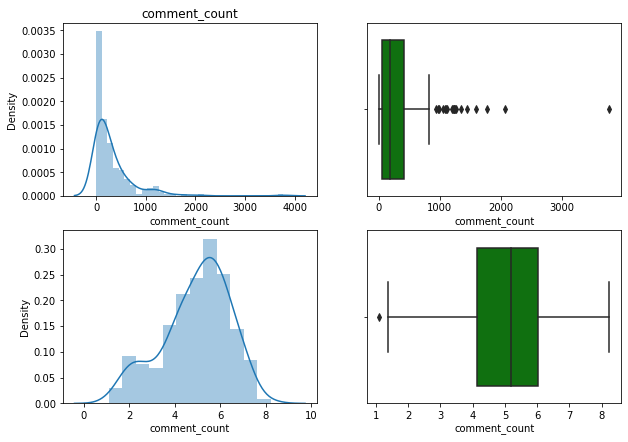

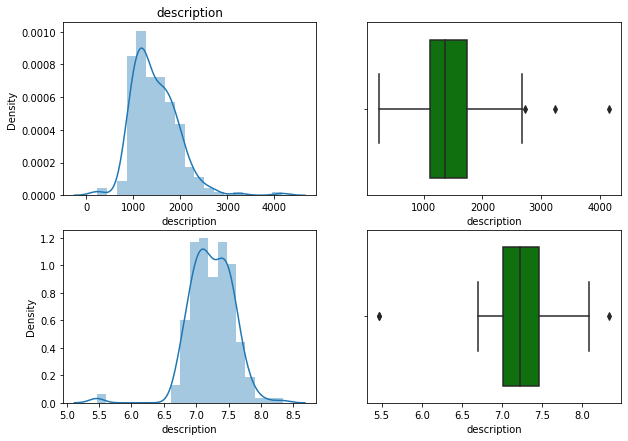

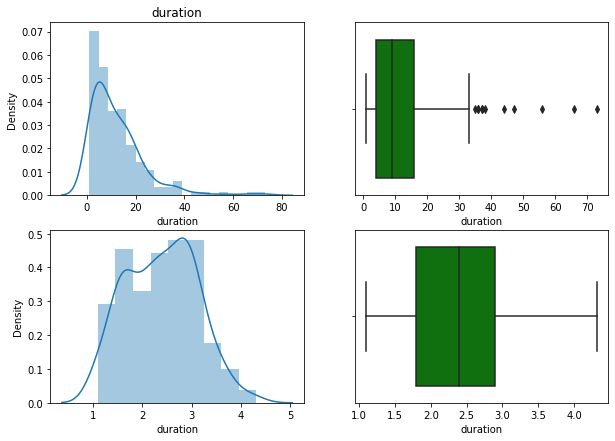

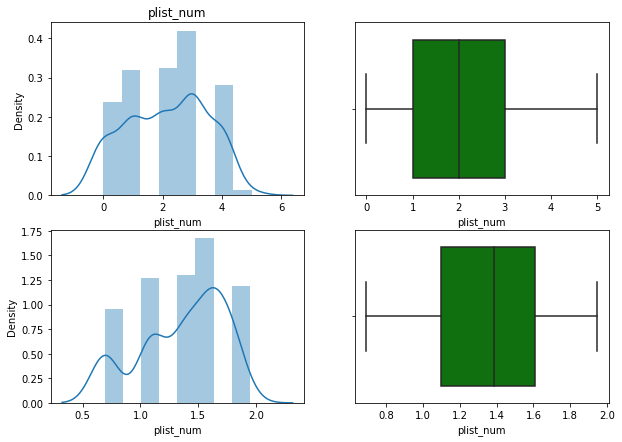

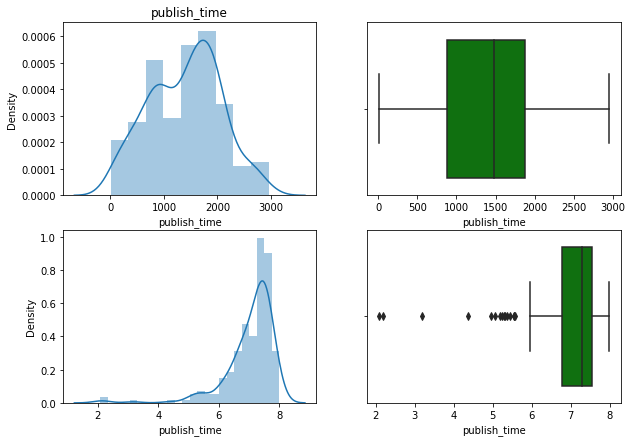

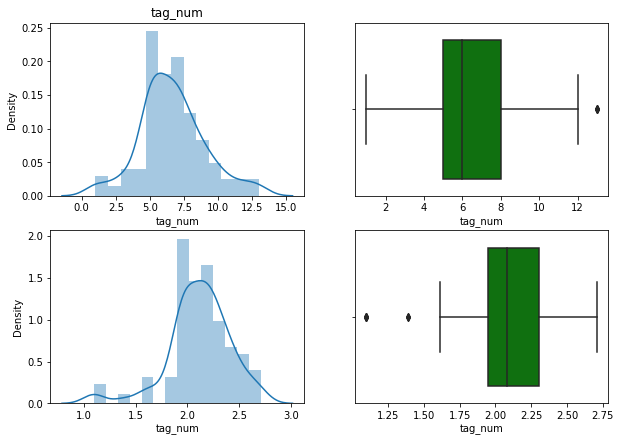

In [185]:
for i in ['like_count', 'comment_count', 'description', 'duration', 'plist_num','publish_time', 'tag_num']:
  f,ax = plt.subplots(2,2,figsize=(10,7))

  g = sns.distplot(data[i],kde=True, ax=ax[0,0]).set(title=i)
  g = sns.boxplot(data[i],color='green',orient='h', ax=ax[0,1])
  g = sns.distplot(np.log1p(data[i]+1),kde=True, ax=ax[1,0]) 
  g = sns.boxplot(np.log1p(data[i]+1),color='green',orient='h', ax=ax[1,1])
  

Log transform for 'like_count', 'comment_count', 'description', 'duration' are nessesary.

In [186]:
features = ['like_count', 'comment_count', 'description', 'duration']

df_nom = data.copy()
for var in features:
    df_nom['log_'+var]= (df_nom[var]+1).apply(np.log)

In [187]:
df_nom.head()

,Publish_date,viewer_count,like_count,comment_count,categroyID,description,duration,plist_num,plist1,publish_time,tag_num,log_like_count,log_comment_count,log_description,log_duration
0,2022-09-20,4119,186,15,27,1239,47,0.0,na,6,7,5.231109,2.772589,7.122867,3.871201
1,2022-09-19,9432,407,44,27,1792,20,0.0,na,7,5,6.011267,3.806662,7.491645,3.044522
2,2022-09-04,8307,373,71,27,1798,5,0.0,na,22,5,5.924256,4.276666,7.494986,1.791759
3,2022-07-11,43389,1634,236,27,2061,16,3.0,Neural Networks / Deep Learning,77,5,7.399398,5.468060,7.631432,2.833213
4,2022-05-09,23215,777,218,27,1006,1,0.0,na,140,5,6.656727,5.389072,6.914731,0.693147


###Normalization

In [189]:
# normalize the rest numerical data
for var in ['plist_num','publish_time','tag_num']:
    df_nom['std_'+var]= MinMaxScaler().fit_transform(df_nom[var].values.reshape(len(df_nom), 1))

In [190]:
df_nom.head()

,Publish_date,viewer_count,like_count,comment_count,categroyID,description,duration,plist_num,plist1,publish_time,tag_num,log_like_count,log_comment_count,log_description,log_duration,std_plist_num,std_publish_time,std_tag_num
0,2022-09-20,4119,186,15,27,1239,47,0.0,na,6,7,5.231109,2.772589,7.122867,3.871201,0.0,0.000000,0.500000
1,2022-09-19,9432,407,44,27,1792,20,0.0,na,7,5,6.011267,3.806662,7.491645,3.044522,0.0,0.000339,0.333333
2,2022-09-04,8307,373,71,27,1798,5,0.0,na,22,5,5.924256,4.276666,7.494986,1.791759,0.0,0.005426,0.333333
3,2022-07-11,43389,1634,236,27,2061,16,3.0,Neural Networks / Deep Learning,77,5,7.399398,5.468060,7.631432,2.833213,0.6,0.024076,0.333333
4,2022-05-09,23215,777,218,27,1006,1,0.0,na,140,5,6.656727,5.389072,6.914731,0.693147,0.0,0.045439,0.333333


**Data Processing**

we take several steps in Processing</br>

Then we fill in the features that have missing values.
After filling in the missing values, we checked duplicated data rows. No duplicatd row was found.
The transformation log is carried out on features with numerical data values to convert them to normal / almost normal distributions, this is done because there are several features that have a skewed data distribution.
Finally, we normalized so that the scale of each numeric feature has the same scale and it is hoped that it can simplify the process of learning the machine learning model data that we created.

##Build models
chose relevant variables

In [192]:
df_nom.columns.values

array(['Publish_date', 'viewer_count', 'like_count', 'comment_count',
       'categroyID', 'description', 'duration', 'plist_num', 'plist1',
       'publish_time', 'tag_num', 'log_like_count', 'log_comment_count',
       'log_description', 'log_duration', 'std_plist_num',
       'std_publish_time', 'std_tag_num'], dtype=object)

In [194]:
df_mol=df_nom[['categroyID', 'plist1', 'log_like_count', 'log_comment_count',
       'log_description', 'log_duration', 'std_plist_num','std_publish_time', 'std_tag_num']]
df_mol.head()

,categroyID,plist1,log_like_count,log_comment_count,log_description,log_duration,std_plist_num,std_publish_time,std_tag_num
0,27,na,5.231109,2.772589,7.122867,3.871201,0.0,0.000000,0.500000
1,27,na,6.011267,3.806662,7.491645,3.044522,0.0,0.000339,0.333333
2,27,na,5.924256,4.276666,7.494986,1.791759,0.0,0.005426,0.333333
3,27,Neural Networks / Deep Learning,7.399398,5.468060,7.631432,2.833213,0.6,0.024076,0.333333
4,27,na,6.656727,5.389072,6.914731,0.693147,0.0,0.045439,0.333333


In [196]:
df_dummies=pd.get_dummies(df_mol)
X=df_dummies
y=df_nom['viewer_count']
X.shape,y.shape

((221, 28), (221,))

###Split Train & Test

In [199]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=42)

###Fit Simple Linear Regression Model

In [200]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [201]:
pred = regressor.predict(xtest) #Predicting the views

In [205]:
#Evaluation function
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [206]:
eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

MAE: 156829.24
RMSE: 285920.98
R2 score: 0.58


###Fit Ridge Regularization Model

In [207]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)
pred = ridge_model.predict(xtest)
eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

MAE: 150032.25
RMSE: 289477.13
R2 score: 0.57


Randomized Search


In [208]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250,265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


MAE: 192949.73
RMSE: 354653.77
R2 score: 0.36


###Fit Lasso Regularization Model

In [209]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)
pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)


MAE: 156826.27
RMSE: 285922.73
R2 score: 0.58


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.031e+12, tolerance: 1.242e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Randomized Search

In [210]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda

hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.925e+11, tolerance: 1.028e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.842e+11, tolerance: 8.110e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.

MAE: 156829.15
RMSE: 285921.03
R2 score: 0.58


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.842e+11, tolerance: 8.110e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.297e+11, tolerance: 1.089e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

###Fit Decision Tree Model

In [217]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
best_model1=dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)


MAE: 57931.43
RMSE: 144306.15
R2 score: 0.89


###Fit Random Forest Model

In [216]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 68417.69
RMSE: 185451.07
R2 score: 0.83


###Fit Support Vector Regressor Model

In [215]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

MAE: 217495.87
RMSE: 470544.33
R2 score: -0.12


###Save Model

In [219]:
import pickle
pickle.dump(best_model1, open('Desiciontree_model.pkl', 'wb'))
loaded_model = pickle.load(open('Desiciontree_model.pkl', 'rb'))
result = loaded_model.score(xtest,ytest)
print('Model Score : ', str(round(result,2)*100), '%')

Model Score :  89.0 %


In [220]:
print('train accuracy : ', str(round(loaded_model.score(xtrain, ytrain),2)*100), '%')
print('test accuracy : ', str(round(loaded_model.score(xtest, ytest),2)*100), '%')

train accuracy :  100.0 %
test accuracy :  89.0 %


The model we chose has very little tendency to overfitting, but we think it can be tolerated within normal reasonable limits

##Conclusion
Based on the experiments that have been carried out, desicion tree is good for determining the views of Youtube videos.
MAE: 57931.43
RMSE: 144306.15
R2 score: 0.89